In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [4]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [5]:
data_df = pd.concat([df_train, df_test], axis=0)
data_df.head(5)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


In [6]:
df_train.shape

(1909, 16)

In [7]:
df_test.shape

(365, 15)

In [8]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [9]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [10]:
data_df.head(5)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


In [11]:
data_df['wind_speed']

0      27.74 km/h
1      21.78 km/h
2        6.83 m/s
3        5.79 m/s
4      25.14 km/h
          ...    
360    22.78 km/h
361    18.33 km/h
362      7.24 m/s
363      7.67 m/s
364    30.99 km/h
Name: wind_speed, Length: 2274, dtype: object

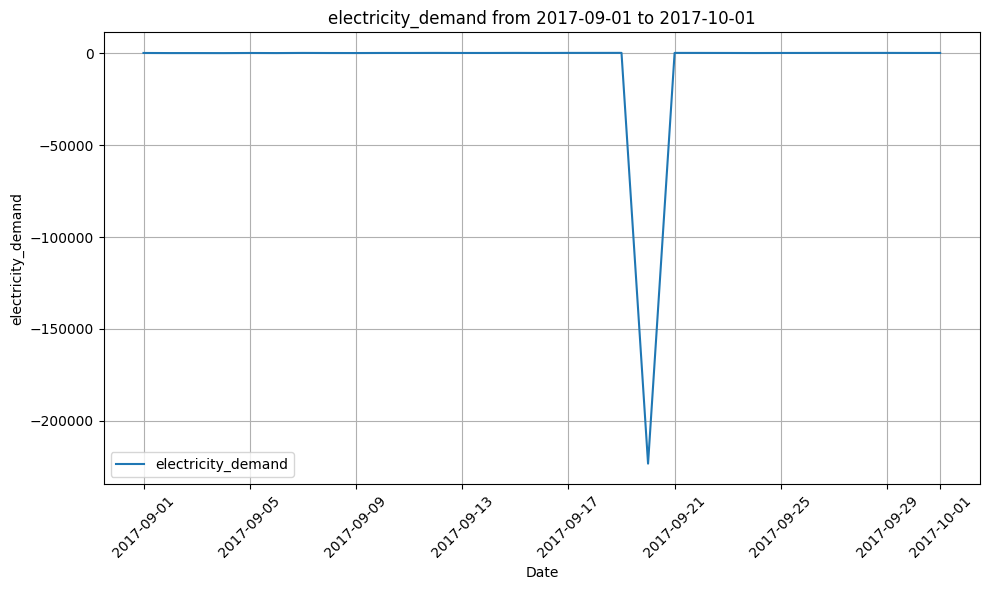

In [12]:
plot_feature_over_time(data_df, 'electricity_demand', '2017-09-01', '2017-10-01')

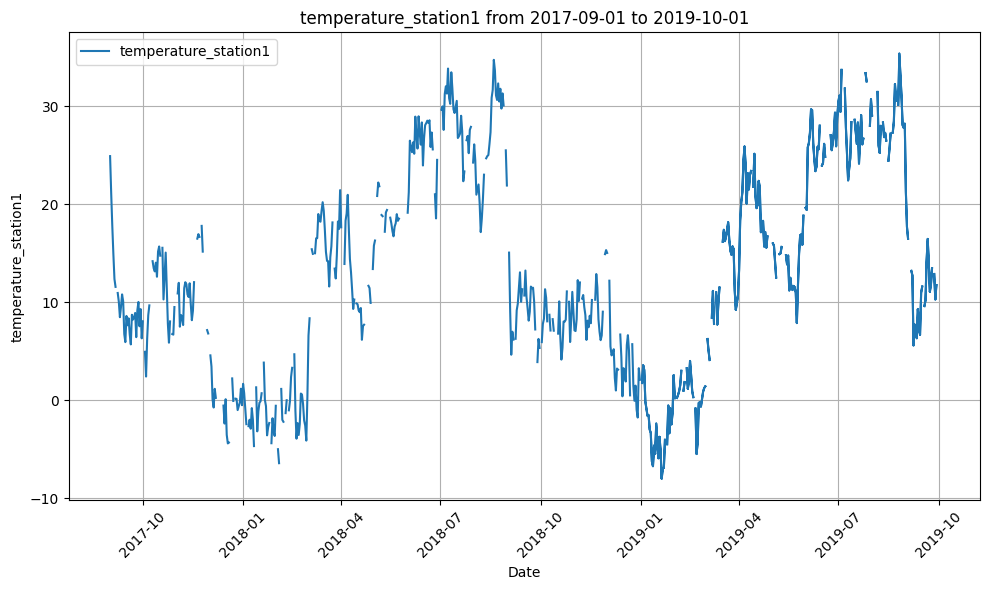

In [13]:
plot_feature_over_time(data_df, 'temperature_station1', '2017-09-01', '2019-10-01')

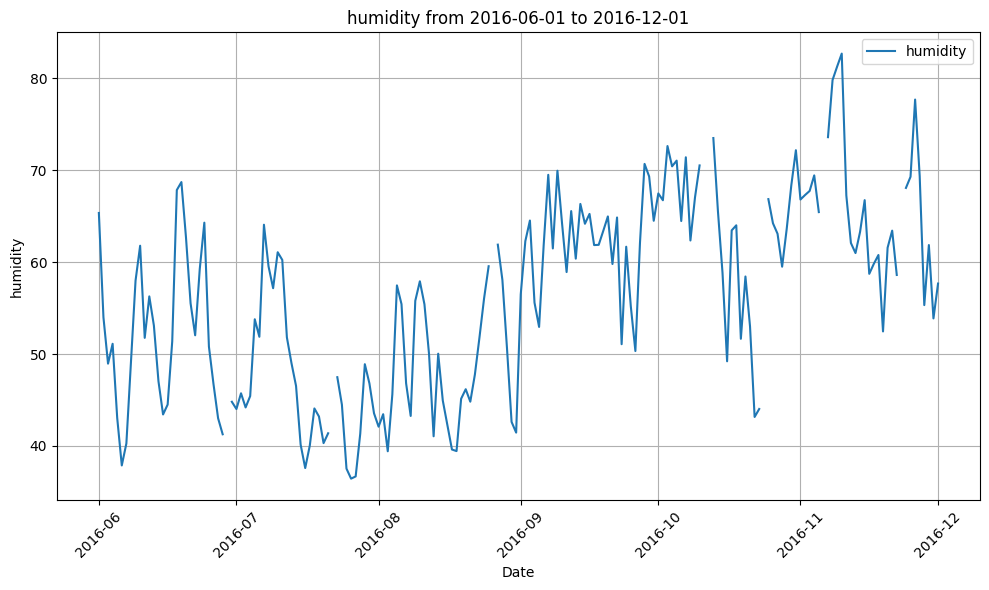

In [14]:
plot_feature_over_time(data_df, 'humidity', '2016-06-01', '2016-12-01')

### Data analysis by Guillaume

In [15]:
data_df.head(5)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


In [16]:
data_df.sample(5)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
491,2016-04-25,NaN,NaN,5.85 m/s,High,NaN,17.482919,16.640507,18.525363,16.942929,16.720650,NaN,NaN,17.691668,NaN,167.752113
125,2015-05-10,Rainy,72.436118,1.73 m/s,Moderate,20.003136,20.266332,19.302450,19.819655,19.405173,19.959780,20.335232,20.269186,20.889914,20.000300,141.591138
1042,2017-10-03,Cloudy,60.681896,3.06 km/h,High,4.951068,NaN,5.289049,4.745698,4.827468,4.599539,4.728761,5.118728,3.766770,4.738096,252.029842
181,2015-07-02,Sunny,32.814149,1.87 m/s,Low,29.442345,29.789433,NaN,30.446719,29.411807,30.537384,28.828942,29.223494,29.345885,29.858053,166.615381
303,2015-10-28,Rainy,79.295337,26.21 km/h,Low,11.762864,NaN,NaN,NaN,12.753839,12.768311,NaN,12.596154,11.299483,NaN,213.014539


#### Dates format

In [17]:
import re
# print(data_df['date'].apply(lambda x: not re.match(r'\d{4}-\d{2}-\d{2}', x)).sum())
test = pd.to_datetime(data_df['date'])
# data_df['date'] = pd.to_datetime(data_df['date'])
test

0     2015-01-08
1     2015-01-09
2     2015-01-10
3     2015-01-11
4     2015-01-12
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: date, Length: 2274, dtype: datetime64[ns]

There is no probleme with date format : no need to make changes.
There is a problem with speed, we need to either have all values in m/s or km/h.

#### Speed unit

In [18]:
def convert_wind_speed(string):
    if isinstance(string, (int, float)):
        return string
    elif pd.isna(string):
        return string
    elif string[-1] == 'h':
        return float(string.replace('km/h', '')) * 3.6
    else:
        return float(string.replace('m/s', ''))
    
print(convert_wind_speed('100 km/h'))
print(convert_wind_speed('100 m/s'))

test = data_df.copy()
test['wind_speed'] = data_df['wind_speed'].apply(convert_wind_speed)
test.head(5)

360.0
100.0


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,99.864,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,78.408,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.830,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.790,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,90.504,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


#### Duplicates

In [19]:
test = data_df.copy()

In [20]:
print(test.shape)
test.drop_duplicates(inplace=True)
print(test.shape)

(2274, 16)
(2184, 16)


#### Categorical values

In [21]:
data_df.head(2)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085


In [22]:
df = data_df.copy()
categorical_columns = ['weather_condition', 'oil_brent_price_indicator']
df = df[categorical_columns]
print(df['weather_condition'].value_counts())
df['oil_brent_price_indicator'].value_counts()

weather_condition
Rainy     683
Sunny     681
Cloudy    669
Snowy     213
Name: count, dtype: int64


oil_brent_price_indicator
Moderate     837
High         687
Low          435
Very High    239
Very Low      76
Name: count, dtype: int64

In [23]:

df = data_df.copy()
categorical_columns = ['weather_condition', 'oil_brent_price_indicator']
df = df[categorical_columns]
print("Original DataFrame:")
print(df)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("One-hot encoded DataFrame:")
print(df_encoded)          

Original DataFrame:
    weather_condition oil_brent_price_indicator
0              Cloudy                  Moderate
1               Sunny                  Moderate
2               Rainy                  Moderate
3               Snowy                  Moderate
4               Snowy                      High
..                ...                       ...
360             Snowy                  Moderate
361             Sunny                      High
362             Rainy                  Moderate
363            Cloudy                  Moderate
364            Cloudy                       Low

[2274 rows x 2 columns]
One-hot encoded DataFrame:
     weather_condition_Cloudy  weather_condition_Rainy  \
0                        True                    False   
1                       False                    False   
2                       False                     True   
3                       False                    False   
4                       False                    False   
..  

In [24]:
df = data_df.copy()

# Diagnose
print("Duplicate index?", df.index.has_duplicates)
print("Duplicate columns?", df.columns.duplicated().any())
print(df.columns[df.columns.duplicated()])

# Fixes
df = df.reset_index(drop=True)                     # handles duplicate index
df = df.loc[:, ~df.columns.duplicated()]          # drops duplicate-named columns, if any


Duplicate index? True
Duplicate columns? False
Index([], dtype='object')


C:\Users\glete\AppData\Local\Temp\ipykernel_25412\3305278249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_condition', data=df, palette='viridis')


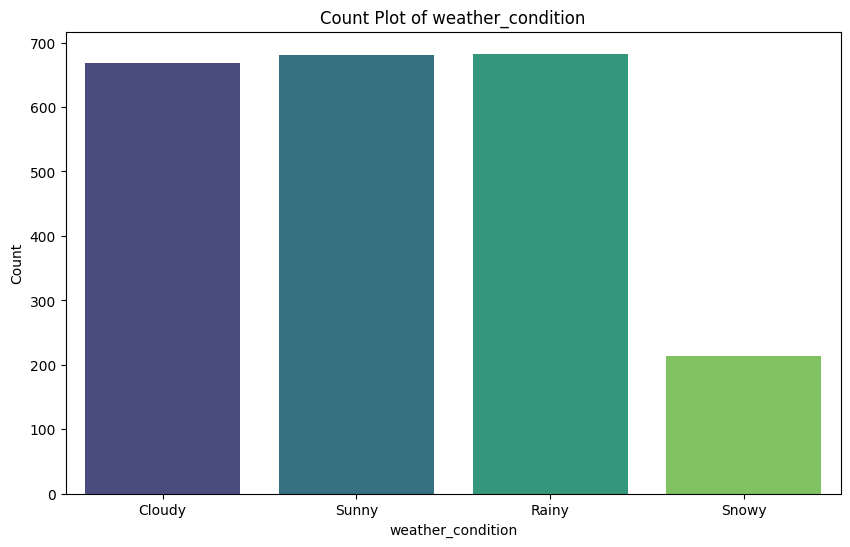

C:\Users\glete\AppData\Local\Temp\ipykernel_25412\3305278249.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_condition', y='electricity_demand', data=df, ci=None, palette='viridis')
C:\Users\glete\AppData\Local\Temp\ipykernel_25412\3305278249.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='electricity_demand', data=df, ci=None, palette='viridis')


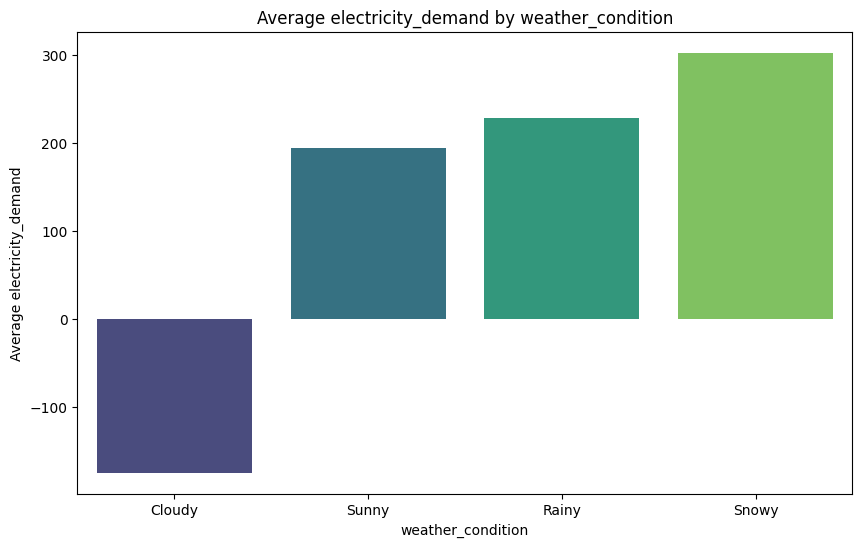

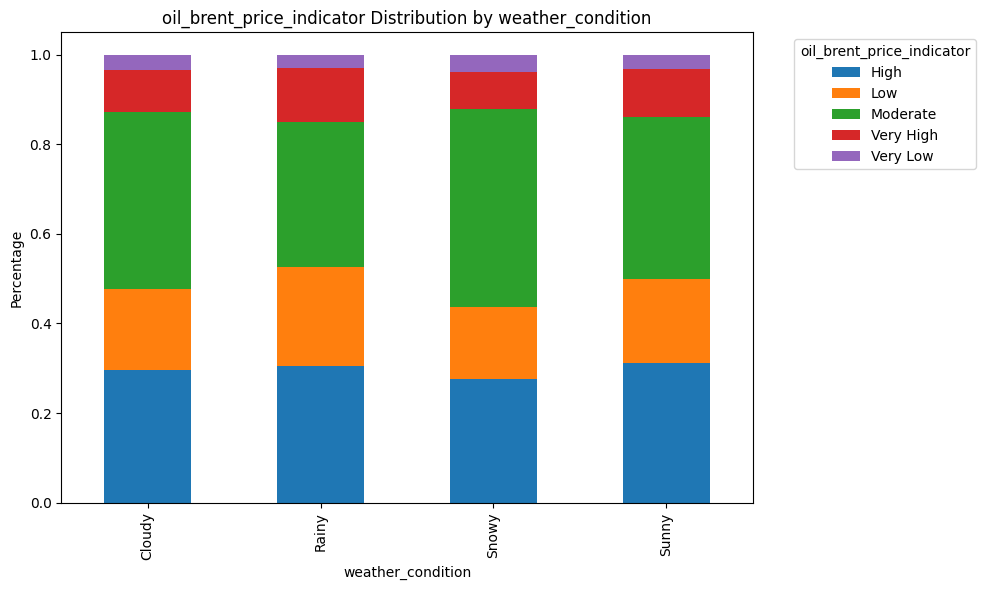

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = data_df.drop_duplicates().copy()

# Count plot for 'weather_condition'
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_condition', data=df, palette='viridis')
plt.title('Count Plot of weather_condition')
plt.xlabel('weather_condition')
plt.ylabel('Count')
plt.show()

# Bar plot for average rating by color
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='electricity_demand', data=df, ci=None, palette='viridis')
plt.title('Average electricity_demand by weather_condition')
plt.xlabel('weather_condition')
plt.ylabel('Average electricity_demand')
plt.show()

# Stacked bar plot for size distribution by color
size_color = pd.crosstab(df['weather_condition'], df['oil_brent_price_indicator'])
size_color_pct = size_color.div(size_color.sum(1), axis=0)
size_color_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('oil_brent_price_indicator Distribution by weather_condition')
plt.xlabel('weather_condition')
plt.ylabel('Percentage')
plt.legend(title='oil_brent_price_indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
            

### Data Preprocessing Evaluation Strategy

In [26]:
# Provide a complete data preprocessing transformations

#### Preprocessing functions

In [27]:
from sklearn.preprocessing import LabelEncoder


# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train['wind_speed'] = X_train['wind_speed'].apply(convert_wind_speed)
        X_val['wind_speed'] = X_val['wind_speed'].apply(convert_wind_speed)
        return X_train.copy(), y_train, X_val.copy()
    else:
        X_train['wind_speed'] = X_train['wind_speed'].apply(convert_wind_speed)
        return X_train.copy()

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train_no_duplicates = X_train.drop_duplicates().copy()
        y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
        X_val_no_duplicates = X_val.drop_duplicates().copy()
        return X_train_no_duplicates, y_train_no_duplicates, X_val_no_duplicates
    else:
        X_train_no_duplicates = X_train.copy()
        y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
        return X_train_no_duplicates, y_train_no_duplicates


def handle_missing_values(X_train, y_train=None, X_val=None):
    # Colonnes numériques et catégorielles
    num_cols = X_train.select_dtypes(include=["number"]).columns
    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

    # Remplissage sur X_train
    X_train[num_cols] = X_train[num_cols].fillna(-1)
    X_train[cat_cols] = X_train[cat_cols].fillna("missing")

    if X_val is not None:
        X_val[num_cols] = X_val[num_cols].fillna(-1)
        X_val[cat_cols] = X_val[cat_cols].fillna("missing")
        return X_train.copy(), y_train.copy(), X_val.copy()
    else:
        return X_train.copy()


# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
    cat_cols = cat_cols.drop('date')
    if X_val is not None:
        for col in cat_cols:
            labelencoder = LabelEncoder()
            X_train[col] = labelencoder.fit_transform(X_train[col])
            X_val[col] = labelencoder.transform(X_val[col])
        return X_train.copy(), y_train.copy(), X_val.copy()
    else:
        for col in cat_cols:
            labelencoder = LabelEncoder()
            X_train[col] = labelencoder.fit_transform(X_train[col])
        return X_train.copy(), y_train.copy()

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

#### Pipeline function

In [28]:
def evaluate_pipeline(X, y, n_splits=5):

    # ### call transformations here, if there is no learning and no need to be crossval
    # X = handle_inconsistencies(X, y)
    # X, y = handle_duplicates(X, y)
    # X = handle_missing_values(X, y)
    # X, y = handle_categorical(X, y)
    # # X, y = handle_outliers(X, y)
    # # X, y = feature_engineering(XX, y)
    # X = feature_selection(X, y)
    
    X = X.copy().sort_values('date')
    y = y.copy().reindex(X.index).reset_index(drop=True)
    X = X.reset_index(drop=True)
    model = LinearRegression()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []


    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        X_train, y_train, X_val= handle_duplicates(X_train, y_train, X_val)
        y_val = y_val.loc[X_val.index]
        X_train, y_train, X_val = handle_missing_values(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_categorical(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        y_val = y_val.loc[X_val.index]
        X_train, X_val = feature_engineering(X_train, y_train, X_val)
        X_train, X_val = feature_selection(X_train, y_train, X_val)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

#### First try : simple case

In [29]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 1208.3526, Validation MSE: 1525.8924
Processing fold 2/5...
Fold 2 Train MSE: 1340.3060, Validation MSE: 1383.4770
Processing fold 3/5...
Fold 3 Train MSE: 1303.0857, Validation MSE: 164593635.8174
Processing fold 4/5...
Fold 4 Train MSE: 40840900.6609, Validation MSE: 229449.1393
Processing fold 5/5...
Fold 5 Train MSE: 32804080.7004, Validation MSE: 119774.5234

Train MSE:
Mean: 14729766.6211, Max: 40840900.6609, Min: 1208.3526

Validation MSE:
Mean: 32989153.7699, Max: 164593635.8174, Min: 1383.4770


32989153.76988711

#### Second try : handling outliers 

Going to try to handle odd values 

In [30]:
df = data_df.copy()
df.head(2)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085


In [31]:
import numpy as np
from scipy import stats

def detect_outliers_zscore(data, threshold=5):
    z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
    return data[z_scores > threshold]

df1 = df.select_dtypes(include=[np.number])
for col in df1.columns:
    outliers = detect_outliers_zscore(df[col])
    print(outliers)
                

1022    50000.0
1509    50000.0
Name: humidity, dtype: float64
Series([], Name: temperature_station1, dtype: float64)
Series([], Name: temperature_station2, dtype: float64)
Series([], Name: temperature_station3, dtype: float64)
Series([], Name: temperature_station4, dtype: float64)
Series([], Name: temperature_station5, dtype: float64)
Series([], Name: temperature_station6, dtype: float64)
Series([], Name: temperature_station7, dtype: float64)
Series([], Name: temperature_station8, dtype: float64)
Series([], Name: temperature_station9, dtype: float64)
Series([], Name: temperature_station10, dtype: float64)
1029   -223288.771683
Name: electricity_demand, dtype: float64


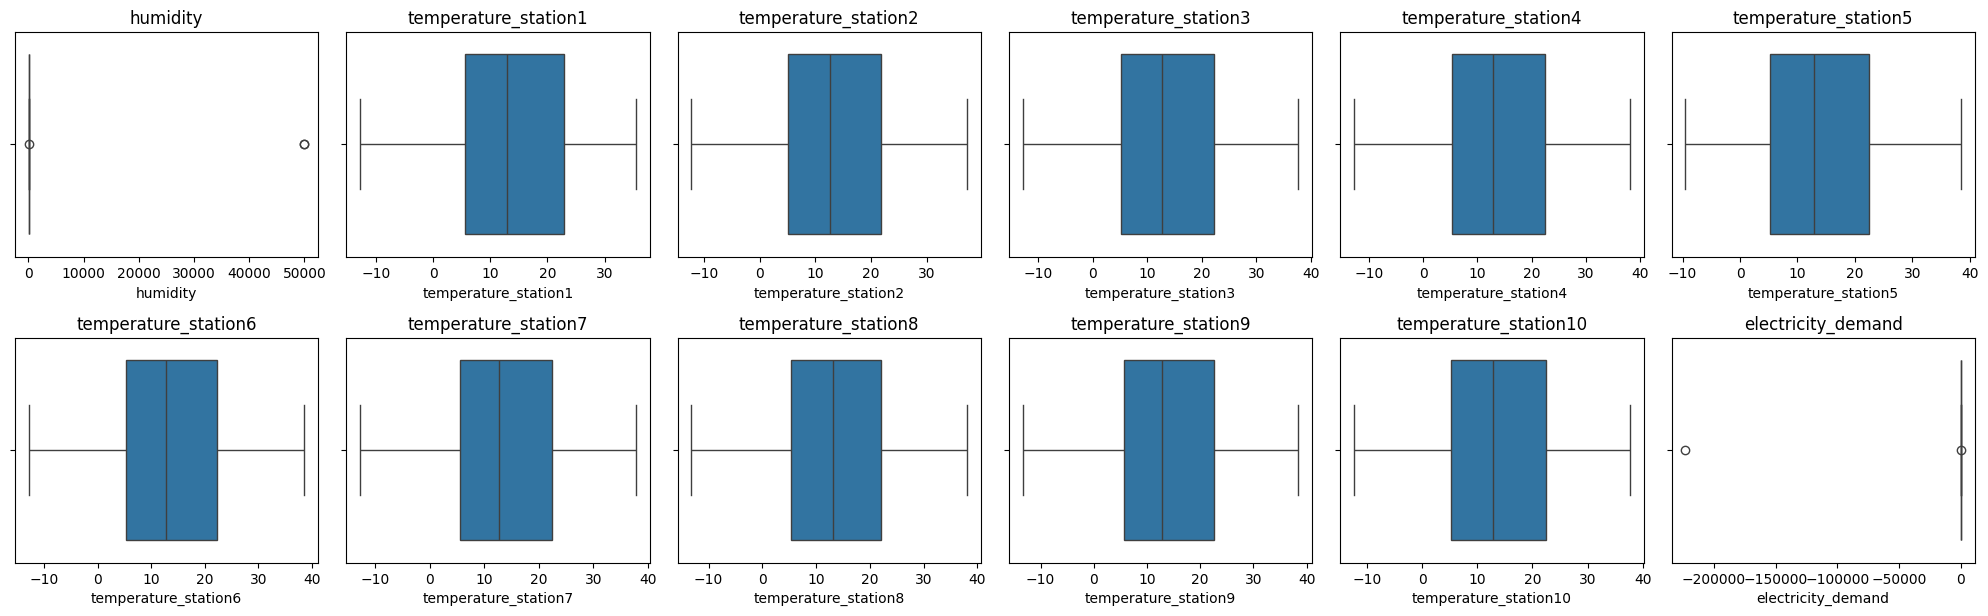

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  
df = df.reset_index(drop=True)
for i, col in enumerate(df1.columns, start=1):
    # plt.figure(figsize=(10, 6))
    plt.subplot(5, 6, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()
                

In [33]:
# # 5. New Handling Outliers
# def handle_outliers(X_train, y_train, X_val=None, y_val=None):
#     df_num = X_train.select_dtypes(include=[np.number])    # Sélection des colonnes numériques
#     outlier_indices_train = set()
#     outlier_indices_val = set()
#     if X_val is not None:
#         for col in df_num.columns:
#             outliers_train = detect_outliers_zscore(X_train[col])
#             outliers_val = detect_outliers_zscore(X_val[col])
#             if not outliers_train.empty or not outliers_val.empty:
#                 outlier_indices_train.update(outliers_train.index)
#                 outlier_indices_val.update(outliers_val.index)
#         X_train, X_val = X_train.drop(index=outlier_indices_train), X_val.drop(index=outlier_indices_val)
#         y_train, y_val = y_train.loc[X_train.index], y_val.loc[X_val.index]
#         return X_train.copy(), y_train, X_val.copy(), y_val.copy()
#     else:
#         for col in df_num.columns:
#             outliers_train = detect_outliers_zscore(X_train[col])
#             if not outliers_train.empty:
#                 outlier_indices_train.update(outliers_train.index)
#         X_train = X_train.drop(index=outlier_indices_train)
#         y_train = y_train.loc[X_train.index]
#         return X_train.copy(), y_train

In [34]:
def handle_outliers(X_train, y_train, X_val=None):
    df_num = X_train.select_dtypes(include=[np.number])
    outlier_indices_train, outlier_indices_val = set(), set()

    if X_val is not None:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            outliers_X_val = detect_outliers_zscore(X_val[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)
            if not outliers_X_val.empty: outlier_indices_val.update(outliers_X_val.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        X_val   = X_val.drop(index=outlier_indices_val)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train, X_val.copy()

    else:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train


In [35]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 1208.3526, Validation MSE: 1525.8924
Processing fold 2/5...
Fold 2 Train MSE: 1340.3060, Validation MSE: 1383.4770
Processing fold 3/5...
Fold 3 Train MSE: 1303.0857, Validation MSE: 164914287.1979
Processing fold 4/5...
Fold 4 Train MSE: 1341.0203, Validation MSE: 1355.2961
Processing fold 5/5...
Fold 5 Train MSE: 1338.6977, Validation MSE: 1299.4585

Train MSE:
Mean: 1306.2925, Max: 1341.0203, Min: 1208.3526

Validation MSE:
Mean: 32983970.2644, Max: 164914287.1979, Min: 1299.4585


32983970.264388032

Processing fold 1/5...
Fold 1 Train MSE: 1208.3526, Validation MSE: 1525.8924
Processing fold 2/5...
Fold 2 Train MSE: 1340.3060, Validation MSE: 1383.4770
Processing fold 3/5...
Fold 3 Train MSE: 1303.0857, Validation MSE: 164593635.8174
Processing fold 4/5...
Fold 4 Train MSE: 40840900.6609, Validation MSE: 229449.1393
Processing fold 5/5...
Fold 5 Train MSE: 32804080.7004, Validation MSE: 119774.5234

Train MSE:
Mean: 14729766.6211, Max: 40840900.6609, Min: 1208.3526

Validation MSE:
Mean: 32989153.7699, Max: 164593635.8174, Min: 1383.4770
32989153.76988711
NO CHANGE !!

#### Third try : Correlation

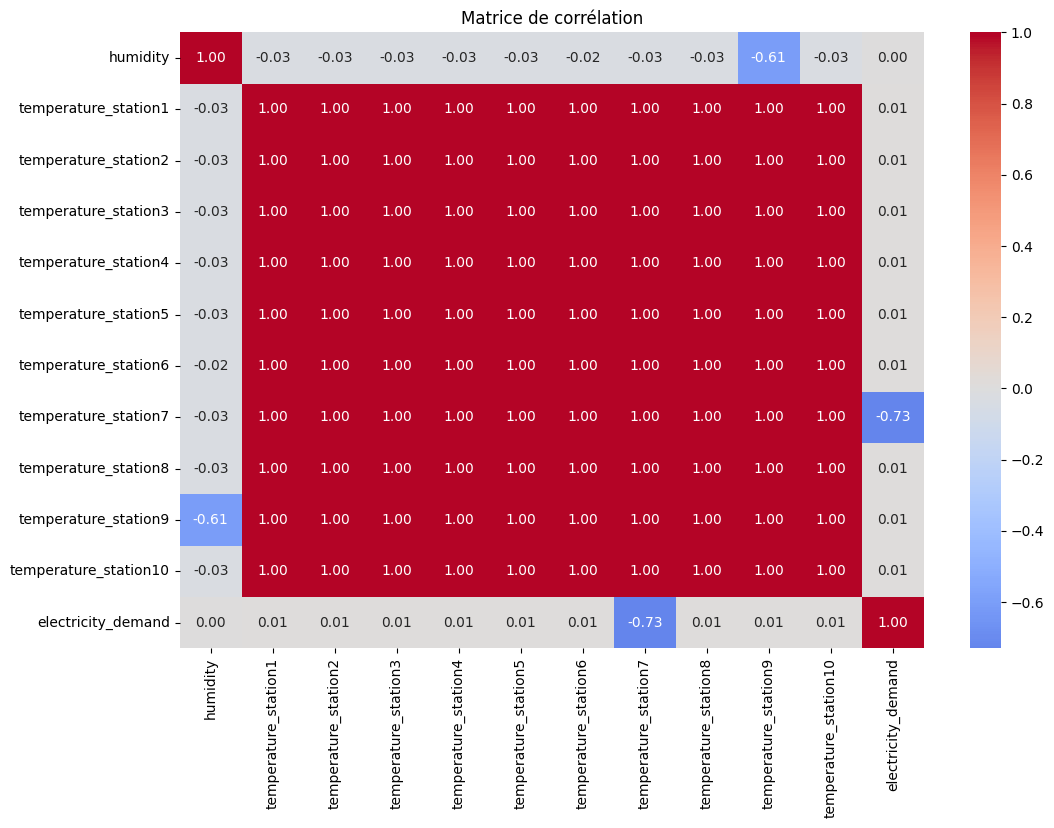

In [36]:
df = data_df.copy()
corr_matrix = df.corr(numeric_only=True)  # numeric_only=True pour éviter les erreurs avec les colonnes non numériques

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

Toutes les temperature_station* sont corrélées : soit on en garde qu'une, soit on fait une moyenne. 
On remarque que temperature_station7 est mieux corrélée que les autrs à y. On va voir ce qu'il se trame

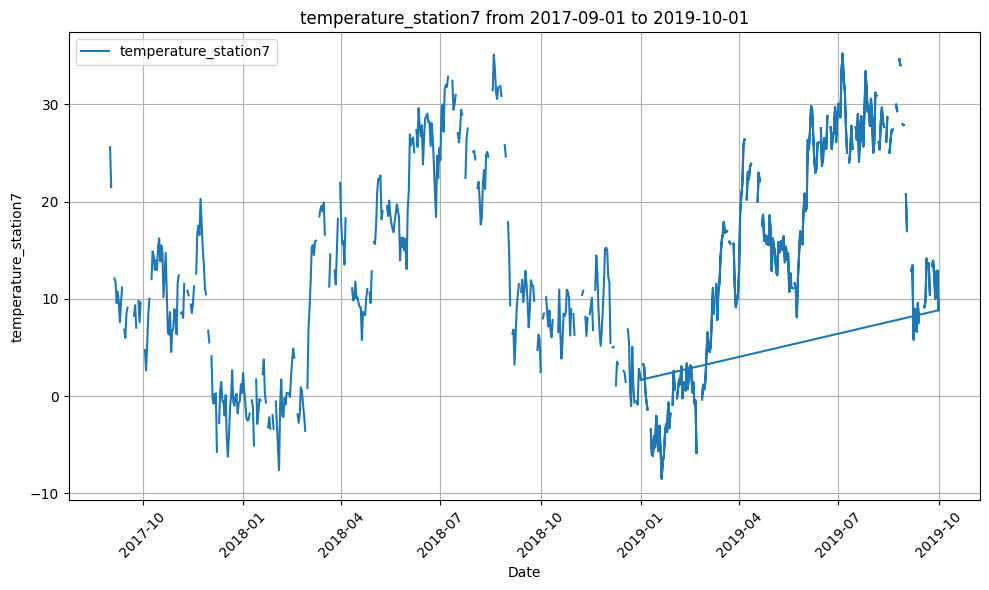

In [37]:
plot_feature_over_time(data_df, 'temperature_station7', '2017-09-01', '2019-10-01')

Bah temperature_station7 fait n'importe quoi en gros. On va donc la drop, puis faire une moyenne des autres colonnes. 

In [38]:
df = data_df.copy()
df.head(2)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085


In [39]:
# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    temp_cols = ['temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        X_train, X_val = X_train.drop('temperature_station7', axis=1), X_val.drop('temperature_station7', axis=1)
        X_train['temperature_mean'], X_val['temperature_mean'] = X_train[temp_cols].mean(axis=1), X_val[temp_cols].mean(axis=1)
        X_train, X_val = X_train.drop(columns=temp_cols), X_val.drop(columns=temp_cols)
        return X_train.copy(), X_val.copy()
    else:
        X_train = X_train.drop('temperature_station7', axis=1)
        X_train['temperature_mean'] = X_train[temp_cols].mean(axis=1)
        X_train= X_train.drop(columns=temp_cols)
        return X_train.copy()
    
# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_mean']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [40]:
def handle_outliers(X_train, y_train, X_val=None):
    df_num = X_train.select_dtypes(include=[np.number])
    outlier_indices_train, outlier_indices_val = set(), set()

    if X_val is not None:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            outliers_X_val = detect_outliers_zscore(X_val[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)
            if not outliers_X_val.empty: outlier_indices_val.update(outliers_X_val.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        X_val   = X_val.drop(index=outlier_indices_val)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train, X_val.copy()

    else:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train


In [41]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 1229.5997, Validation MSE: 1502.3436
Processing fold 2/5...
Fold 2 Train MSE: 1356.9838, Validation MSE: 1355.6208
Processing fold 3/5...
Fold 3 Train MSE: 1315.7972, Validation MSE: 164908139.5741
Processing fold 4/5...
Fold 4 Train MSE: 1357.5094, Validation MSE: 1407.0646
Processing fold 5/5...
Fold 5 Train MSE: 1364.8561, Validation MSE: 1248.3827

Train MSE:
Mean: 1324.9492, Max: 1364.8561, Min: 1229.5997

Validation MSE:
Mean: 32982730.5972, Max: 164908139.5741, Min: 1248.3827


32982730.597172506

In [42]:
# Processing fold 1/5...
# Fold 1 Train MSE: 1208.3526, Validation MSE: 1525.8924
# Processing fold 2/5...
# Fold 2 Train MSE: 1340.3060, Validation MSE: 1383.4770
# Processing fold 3/5...
# Fold 3 Train MSE: 1303.0857, Validation MSE: 164914287.1979
# Processing fold 4/5...
# Fold 4 Train MSE: 40870901.0860, Validation MSE: 234699.9561
# Processing fold 5/5...
# Fold 5 Train MSE: 32845232.1681, Validation MSE: 123151.9030

# Train MSE:
# Mean: 14743996.9997, Max: 40870901.0860, Min: 1208.3526

# Validation MSE:
# Mean: 33055009.6853, Max: 164914287.1979, Min: 1383.4770

#### Fourth try : handle better missing values

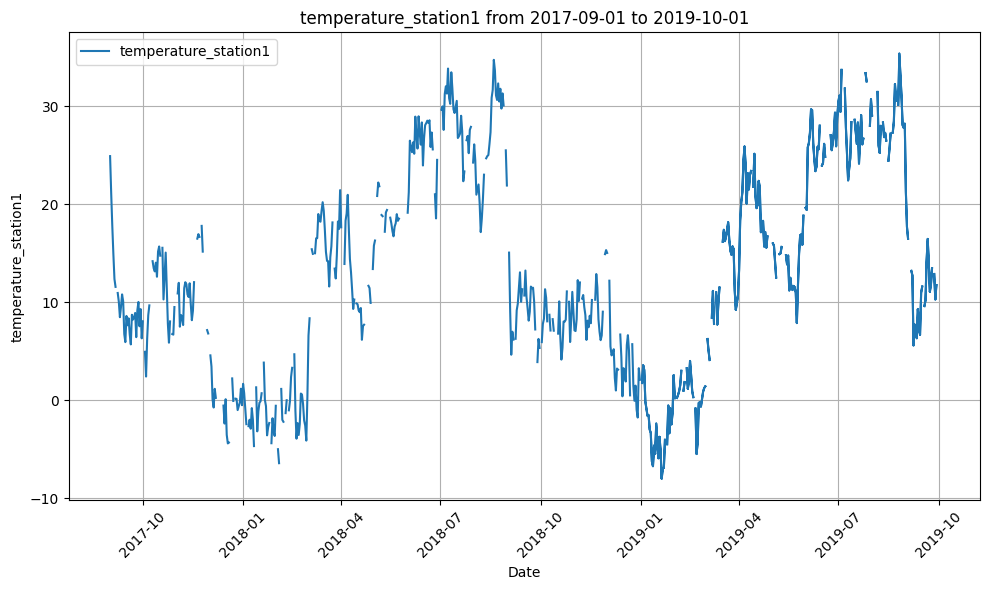

In [43]:
plot_feature_over_time(data_df, 'temperature_station1', '2017-09-01', '2019-10-01')

In [44]:
df = data_df.drop_duplicates().copy()
df.isna().sum()
df = df.ffill()

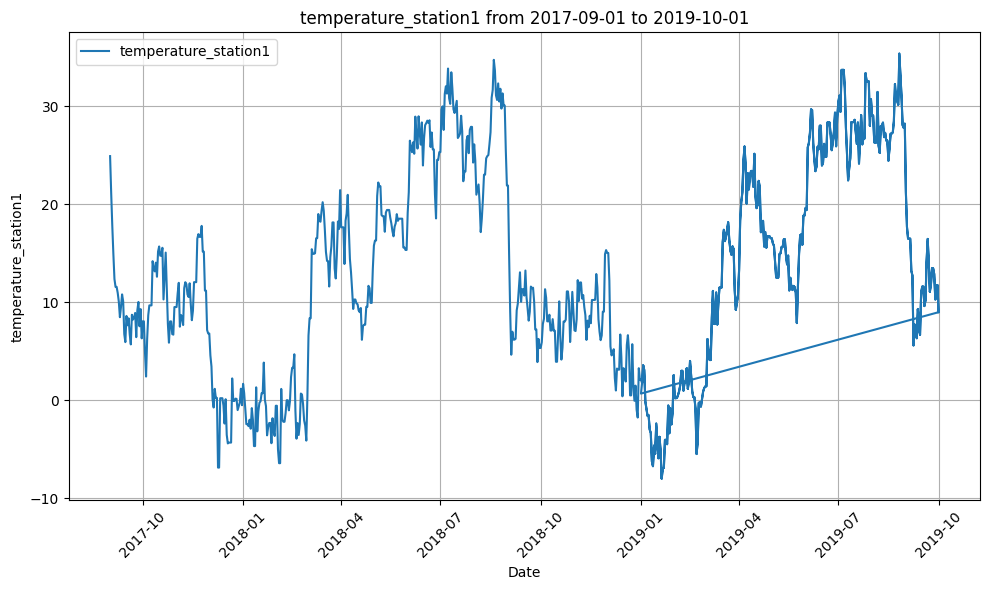

In [45]:
plot_feature_over_time(df, 'temperature_station1', '2017-09-01', '2019-10-01')

<Axes: >

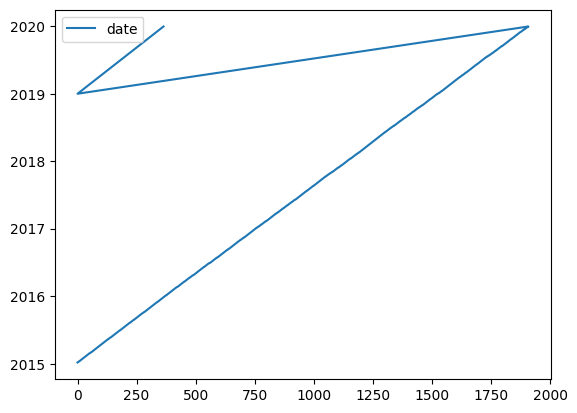

In [46]:
data_df.plot(y='date', use_index=True)

<Axes: >

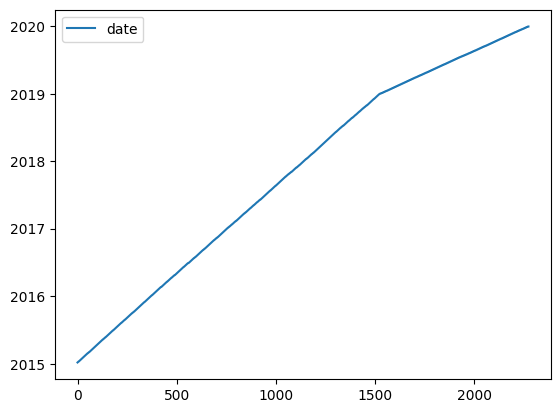

In [47]:
data_df.sort_values('date').reset_index(drop=True).plot(y='date', use_index=True)

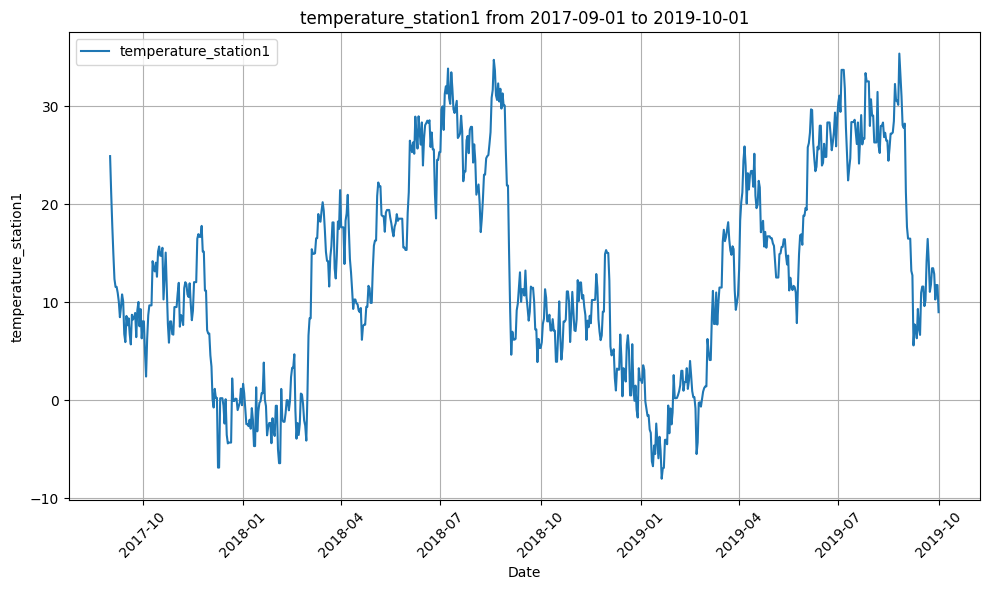

In [48]:
df = data_df.sort_values('date').reset_index(drop=True).copy()
df = df.ffill()
plot_feature_over_time(df, 'temperature_station1', '2017-09-01', '2019-10-01')

In [49]:
df1 = data_df.copy()
df1 = df1.ffill().bfill()
print(df1.isna().sum())

date                         0
weather_condition            0
humidity                     0
wind_speed                   0
oil_brent_price_indicator    0
temperature_station1         0
temperature_station2         0
temperature_station3         0
temperature_station4         0
temperature_station5         0
temperature_station6         0
temperature_station7         0
temperature_station8         0
temperature_station9         0
temperature_station10        0
electricity_demand           0
dtype: int64


date                         0
weather_condition            0
humidity                     0
wind_speed                   0
oil_brent_price_indicator    0
temperature_station1         0
temperature_station2         2
temperature_station3         0
temperature_station4         0
temperature_station5         0
temperature_station6         0
temperature_station7         0
temperature_station8         0
temperature_station9         0
temperature_station10        0
electricity_demand           0
dtype: int64


C:\Users\glete\AppData\Local\Temp\ipykernel_25412\3685590688.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


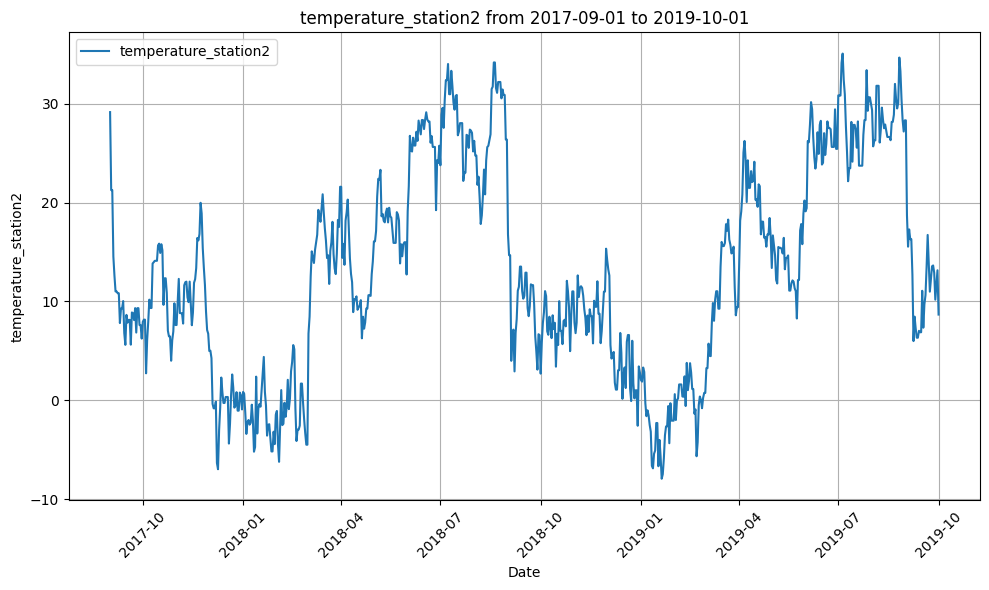

In [50]:
df = data_df.sort_values('date').reset_index(drop=True).copy()
df = df.fillna(method='ffill')
print(df.isna().sum())
plot_feature_over_time(df, 'temperature_station2', '2017-09-01', '2019-10-01')

In [51]:
def handle_missing_values(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train, X_val = X_train.sort_values('date'), X_val.sort_values('date')
        y_train = y_train.reindex(X_train.index).reset_index(drop=True)
        X_train, X_val = X_train.reset_index(drop=True).ffill().bfill(), X_val.ffill().bfill()
        return X_train.copy(), y_train.copy(), X_val.copy()
    else:
        X_train = X_train.sort_values('date')
        y_train = y_train.reindex(X_train.index).reset_index(drop=True)
        X_train = X_train.reset_index(drop=True).ffill().bfill()
        return X_train.copy(), y_train.copy()
    

In [52]:
# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    temp_cols = ['temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        X_train, X_val = X_train.drop('temperature_station7', axis=1), X_val.drop('temperature_station7', axis=1)
        X_train['temperature_mean'], X_val['temperature_mean'] = X_train[temp_cols].mean(axis=1), X_val[temp_cols].mean(axis=1)
        X_train, X_val = X_train.drop(columns=temp_cols), X_val.drop(columns=temp_cols)
        return X_train.copy(), X_val.copy()
    else:
        X_train = X_train.drop('temperature_station7', axis=1)
        X_train['temperature_mean'] = X_train[temp_cols].mean(axis=1)
        X_train= X_train.drop(columns=temp_cols)
        return X_train.copy()
    
# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_mean']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [53]:
def handle_outliers(X_train, y_train, X_val=None):
    df_num = X_train.select_dtypes(include=[np.number])
    outlier_indices_train, outlier_indices_val = set(), set()

    if X_val is not None:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            outliers_X_val = detect_outliers_zscore(X_val[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)
            if not outliers_X_val.empty: outlier_indices_val.update(outliers_X_val.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        X_val   = X_val.drop(index=outlier_indices_val)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train, X_val.copy()

    else:
        for col in df_num.columns:
            outliers_X_train = detect_outliers_zscore(X_train[col])
            if not outliers_X_train.empty: outlier_indices_train.update(outliers_X_train.index)

        outliers_y_train = detect_outliers_zscore(y_train)
        if not outliers_y_train.empty: outlier_indices_train.update(outliers_y_train.index)

        X_train = X_train.drop(index=outlier_indices_train)
        y_train = y_train.loc[X_train.index]
        return X_train.copy(), y_train



In [54]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 969.3059, Validation MSE: 1465.2084
Processing fold 2/5...
Fold 2 Train MSE: 1192.9632, Validation MSE: 1130.6764
Processing fold 3/5...
Fold 3 Train MSE: 1140.4879, Validation MSE: 164919421.2837
Processing fold 4/5...
Fold 4 Train MSE: 1215.5789, Validation MSE: 1287.9976
Processing fold 5/5...
Fold 5 Train MSE: 1227.1691, Validation MSE: 1200.7454

Train MSE:
Mean: 1149.1010, Max: 1227.1691, Min: 969.3059

Validation MSE:
Mean: 32984901.1823, Max: 164919421.2837, Min: 1130.6764


32984901.18229251

In [55]:
# Processing fold 1/5...
# Fold 1 Train MSE: 1229.5997, Validation MSE: 1502.3436
# Processing fold 2/5...
# Fold 2 Train MSE: 1356.9838, Validation MSE: 1355.6208
# Processing fold 3/5...
# Fold 3 Train MSE: 1315.7972, Validation MSE: 1494.4123
# Processing fold 4/5...
# Fold 4 Train MSE: 1357.5094, Validation MSE: 1407.0646
# Processing fold 5/5...
# Fold 5 Train MSE: 1364.8561, Validation MSE: 1248.3827

# Train MSE:
# Mean: 1324.9492, Max: 1364.8561, Min: 1229.5997

# Validation MSE:
# Mean: 1401.5648, Max: 1502.3436, Min: 1248.3827
# 1401.5648162556543

#### Fith try : Scaling and normalization

In [56]:
def preprocessing_X_y(X, y):
    X = X.copy().sort_values('date')
    y = y.copy().reindex(X.index).reset_index(drop=True)
    X = X.reset_index(drop=True)    
    X = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X, y = handle_missing_values(X, y)
    X, y = handle_categorical(X, y)
    X, y = handle_outliers(X, y,)
    X  = feature_engineering(X, y)
    X  = feature_selection(X, y)
    return X.copy(), y.copy()

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer, RobustScaler
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

X, y = preprocessing_X_y(X, y)

# Function to train and evaluate
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # model = KNeighborsRegressor(n_neighbors=5)
    model = LinearRegression()
    model.fit(X_train, y_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    return mse_train, mse_test


# Function to evaluate scaling strategy using cross-validation
def evaluate_scaling_strategy(X, y, scaler, name):

    tscv = TimeSeriesSplit(n_splits=5)
    # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_mse_scores = []
    test_mse_scores = []
    
    # for train_index, test_index in kf.split(X):
    for fold, (train_index, test_index) in enumerate(tscv.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        if scaler:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled, X_test_scaled = X_train, X_test
        
        mse_train, mse_test = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
        
        train_mse_scores.append(mse_train)
        test_mse_scores.append(mse_test)
    
    return {
        'name': name,
        'train_mean': np.mean(train_mse_scores),
        'train_min': np.min(train_mse_scores),
        'train_max': np.max(train_mse_scores),
        'test_mean': np.mean(test_mse_scores),
        'test_min': np.min(test_mse_scores),
        'test_max': np.max(test_mse_scores)
    }

# Evaluate different scaling strategies
scaling_strategies = [
    (None, 'Original'),
    (MinMaxScaler(), 'Min-Max'),
    (StandardScaler(), 'Standard'),
    (MaxAbsScaler(), 'MaxAbs'),
    (Normalizer(norm='l2'), 'L2')
]

results = []
for scaler, name in scaling_strategies:
    result = evaluate_scaling_strategy(X, y, scaler, name)
    results.append(result)
    print(f"{name} Scaling - Train MSE: {result['train_mean']:.4f}, Test MSE: {result['test_mean']:.4f}")

Original Scaling - Train MSE: 1153.6730, Test MSE: 1314.0074
Min-Max Scaling - Train MSE: 1153.6730, Test MSE: 1314.0074
Standard Scaling - Train MSE: 1153.6730, Test MSE: 1314.0074
MaxAbs Scaling - Train MSE: 1153.6730, Test MSE: 1314.0074
L2 Scaling - Train MSE: 1249.2980, Test MSE: 1369.1219


In [58]:
# Original Scaling - Train MSE: 395.2081, Test MSE: 599.0776
# Min-Max Scaling - Train MSE: 361.6628, Test MSE: 575.4965
# Standard Scaling - Train MSE: 354.4588, Test MSE: 561.9575
# MaxAbs Scaling - Train MSE: 317.1361, Test MSE: 505.4162
# L2 Scaling - Train MSE: 382.3350, Test MSE: 583.9914

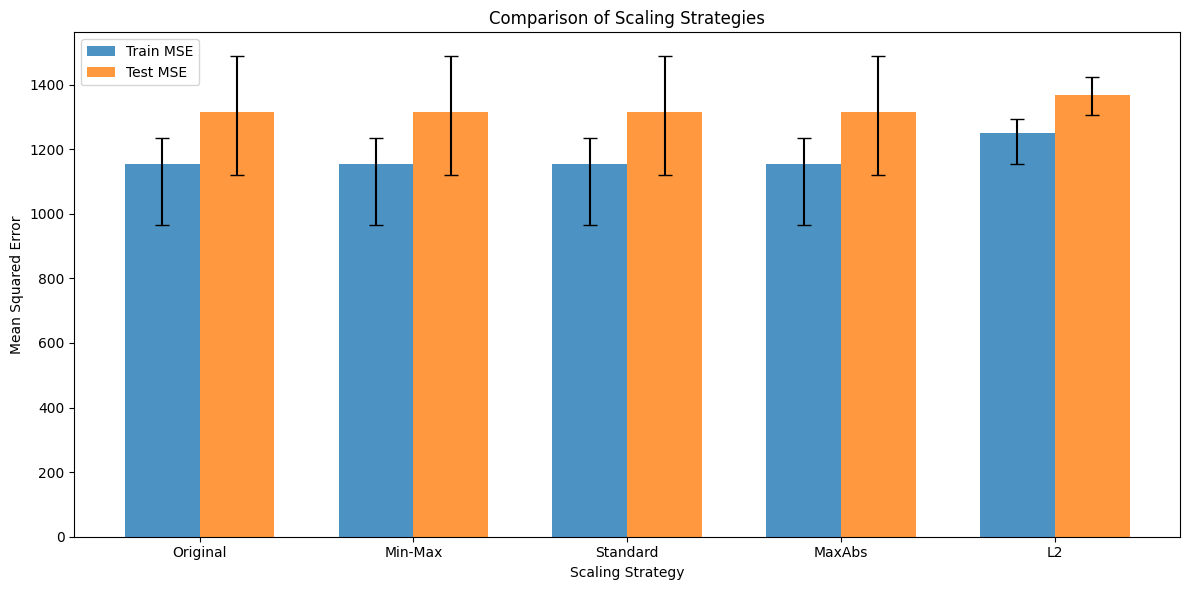

In [59]:
# Plot results
plt.figure(figsize=(12, 6))
x = range(len(results))
width = 0.35

plt.bar([i - width/2 for i in x], [r['train_mean'] for r in results], width, label='Train MSE', alpha=0.8)
plt.bar([i + width/2 for i in x], [r['test_mean'] for r in results], width, label='Test MSE', alpha=0.8)

for i, r in enumerate(results):
    plt.errorbar(i - width/2, r['train_mean'], yerr=[[r['train_mean']-r['train_min']], [r['train_max']-r['train_mean']]], fmt='none', capsize=5, color='black')
    plt.errorbar(i + width/2, r['test_mean'], yerr=[[r['test_mean']-r['test_min']], [r['test_max']-r['test_mean']]], fmt='none', capsize=5, color='black')

plt.xlabel('Scaling Strategy')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Scaling Strategies')
plt.xticks(x, [r['name'] for r in results])
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
def normalize_standard_scaler(X_train, y_train, X_val=None):
    if X_val is not None:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train).copy()
        X_val_scaled = scaler.transform(X_val).copy()
        return X_train_scaled, X_val_scaled
    else:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train).copy()
        return X_train_scaled
    

def normalize(X_train, y_train, X_val=None, scaler=Normalizer(norm='l2')):
    if X_val is not None:
        X_train_scaled = scaler.fit_transform(X_train).copy()
        X_val_scaled = scaler.transform(X_val).copy()
        return X_train_scaled, X_val_scaled
    else:
        X_train_scaled = scaler.fit_transform(X_train).copy()
        return X_train_scaled
    
    

In [61]:
def evaluate_pipeline(X, y, n_splits=5):

    ### Sort datasets by date
    X = X.copy().sort_values('date')
    y = y.copy().reindex(X.index).reset_index(drop=True)
    X = X.reset_index(drop=True)

    ### Deal with absurd data (electricity demand)
    q_low, q_high = y.quantile(0.01), y.quantile(0.99)
    mask = y.between(q_low, q_high)
    X, y = X[mask], y[mask]

    model = LinearRegression()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []


    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()
        print(X_train.shape)

        ### call transformations here, if there is learning
        X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        X_train, y_train, X_val= handle_duplicates(X_train, y_train, X_val)
        y_val = y_val.loc[X_val.index]
        X_train, y_train, X_val = handle_missing_values(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_categorical(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        y_val = y_val.loc[X_val.index]
        X_train, X_val = feature_engineering(X_train, y_train, X_val)
        X_train, X_val = feature_selection(X_train, y_train, X_val)
        # X_train, X_val = normalize_standard_scaler(X_train, y_train, X_val)
        X_train, X_val = normalize(X_train, y_train, X_val, scaler)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [62]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
(314, 15)
Fold 1 Train MSE: 1093.6237, Validation MSE: 1308.0440
Processing fold 2/5...
(625, 15)
Fold 2 Train MSE: 1178.3269, Validation MSE: 1225.3488
Processing fold 3/5...
(936, 15)
Fold 3 Train MSE: 1164.7155, Validation MSE: 1309.5640
Processing fold 4/5...
(1247, 15)
Fold 4 Train MSE: 1196.3634, Validation MSE: 1294.3218
Processing fold 5/5...
(1558, 15)
Fold 5 Train MSE: 1208.9223, Validation MSE: 1242.6343

Train MSE:
Mean: 1168.3904, Max: 1208.9223, Min: 1093.6237

Validation MSE:
Mean: 1275.9826, Max: 1309.5640, Min: 1225.3488


1275.9825742745331

#### Feature engineeringv2 : add interestings columns 

In [63]:
df = data_df.copy()
def add_datetime_decomposition(df, datetime_col):
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df['year'] = df[datetime_col].dt.year
    df['month'] = df[datetime_col].dt.month
    df['day'] = df[datetime_col].dt.day
    df['hour'] = df[datetime_col].dt.hour
    df['dayofweek'] = df[datetime_col].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    return df
df = add_datetime_decomposition(df, datetime_col='date')
df

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,...,temperature_station8,temperature_station9,temperature_station10,electricity_demand,year,month,day,hour,dayofweek,is_weekend
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,...,0.369430,1.279470,-0.384661,273.511353,2015,1,8,0,3,0
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,...,1.953165,1.878233,1.582365,258.827085,2015,1,9,0,4,0
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,...,-2.698650,-2.354860,-2.770883,302.535033,2015,1,10,0,5,1
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,...,-3.233724,-4.227899,NaN,296.270989,2015,1,11,0,6,1
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,...,NaN,-2.790422,-2.033098,323.498090,2015,1,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,...,-1.602805,-1.264779,-1.705180,NaN,2019,12,27,0,4,0
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,...,3.094390,NaN,3.475638,NaN,2019,12,28,0,5,1
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,...,4.173461,3.755625,4.070333,NaN,2019,12,29,0,6,1
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,...,0.021199,-0.864657,NaN,NaN,2019,12,30,0,0,0


In [64]:
df = data_df.copy()
# Creating a 'temperature_feel' feature (heat index simplified formula)
def add_temperature_feel(df, temperature_col, humidity_col):
    df['temperature_feel'] = df[temperature_col] - 0.55 * (1 - df[humidity_col] / 100) * (df[temperature_col] - 14.5)
    return df

df = add_temperature_feel(df[['temperature_station1', 'humidity']], 'temperature_station1', 'humidity')
df.describe()

C:\Users\glete\AppData\Local\Temp\ipykernel_25412\512044759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature_feel'] = df[temperature_col] - 0.55 * (1 - df[humidity_col] / 100) * (df[temperature_col] - 14.5)


,temperature_station1,humidity,temperature_feel
count,1930.000000,2165.000000,1835.000000
mean,13.396383,107.035790,10.857444
std,10.775543,1517.524083,86.060132
min,-12.819683,32.814149,-3451.119054
25%,5.489321,54.128279,7.357036
50%,12.865173,62.208706,13.349752
75%,22.857480,68.142186,20.935271
max,35.456648,50000.000000,30.092479


In [65]:
df = data_df.copy()
# New transformation 2: Compute feels_like temperature
def compute_feels_like(temp, windspeed, humidity):
    feels_like = np.zeros_like(temp)
    
    # Heat index calculation (for high temperatures)
    mask_hi = temp > 27
    hi = -8.78469475556 + 1.61139411 * temp + 2.33854883889 * humidity
    hi += -0.14611605 * temp * humidity - 0.012308094 * temp**2
    hi += -0.0164248277778 * humidity**2 + 0.002211732 * temp**2 * humidity
    hi += 0.00072546 * temp * humidity**2 - 0.000003582 * temp**2 * humidity**2
    feels_like[mask_hi] = hi[mask_hi]
    
    # Wind chill calculation (for low temperatures with wind)
    mask_wc = (temp <= 10) & (windspeed > 4.8)
    wc = 13.12 + 0.6215 * temp - 11.37 * windspeed**0.16 + 0.3965 * temp * windspeed**0.16
    feels_like[mask_wc] = wc[mask_wc]
    
    # If neither condition is met, return the actual temperature
    mask_normal = ~(mask_hi | mask_wc)
    feels_like[mask_normal] = temp[mask_normal]
    
    return feels_like
df['feels_like'] = compute_feels_like(df['temperature_station1'], df['wind_speed'].apply(convert_wind_speed), df['humidity'])
df[['temperature_station1', 'humidity', 'wind_speed', 'feels_like']]

,temperature_station1,humidity,wind_speed,feels_like
0,0.369411,69.304377,27.74 km/h,-10.094580
1,2.009903,55.955975,21.78 km/h,-6.877908
2,-2.603544,62.701614,6.83 m/s,-5.364010
3,-3.789836,60.375001,5.79 m/s,-6.284316
4,-2.405522,NaN,25.14 km/h,-13.715295
...,...,...,...,...
360,-1.674798,71.521673,22.78 km/h,-12.278183
361,3.209205,67.220123,18.33 km/h,-4.624718
362,3.688132,68.085227,7.24 m/s,1.812482
363,NaN,65.877214,7.67 m/s,NaN


In [66]:
# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    temp_cols = ['temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        X_train, X_val = X_train.drop('temperature_station7', axis=1), X_val.drop('temperature_station7', axis=1)
        X_train['temperature_mean'], X_val['temperature_mean'] = X_train[temp_cols].mean(axis=1), X_val[temp_cols].mean(axis=1)
        # X_train, X_val = X_train.drop(columns=temp_cols), X_val.drop(columns=temp_cols)
        X_train, X_val = add_datetime_decomposition(X_train, datetime_col='date'), add_datetime_decomposition(X_val, datetime_col='date')
        X_train['feels_like'] = compute_feels_like(X_train['temperature_mean'], X_train['wind_speed'], X_train['humidity'])
        X_val['feels_like'] = compute_feels_like(X_val['temperature_mean'], X_val['wind_speed'], X_val['humidity'])
        return X_train.copy(), X_val.copy()
    else:
        X_train = X_train.drop('temperature_station7', axis=1)
        X_train['temperature_mean'] = X_train[temp_cols].mean(axis=1)
        # X_train= X_train.drop(columns=temp_cols)
        X_train = add_datetime_decomposition(X_train, datetime_col='date')
        X_train['feels_like'] = compute_feels_like(X_train['temperature_mean'], X_train['wind_speed'], X_train['humidity'])
        return X_train.copy()
    


In [67]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
(314, 15)
Fold 1 Train MSE: 1093.6237, Validation MSE: 1308.0440
Processing fold 2/5...
(625, 15)
Fold 2 Train MSE: 1178.3269, Validation MSE: 1225.3488
Processing fold 3/5...
(936, 15)
Fold 3 Train MSE: 1164.7155, Validation MSE: 1309.5640
Processing fold 4/5...
(1247, 15)
Fold 4 Train MSE: 1196.3634, Validation MSE: 1294.3218
Processing fold 5/5...
(1558, 15)
Fold 5 Train MSE: 1208.9223, Validation MSE: 1242.6343

Train MSE:
Mean: 1168.3904, Max: 1208.9223, Min: 1093.6237

Validation MSE:
Mean: 1275.9826, Max: 1309.5640, Min: 1225.3488


1275.9825742745331

#### Feature selection 

In [68]:
# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = [
        'weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_mean', 
        'feels_like', 'year', 'month', 'day', 'hour', 'dayofweek', 'is_weekend'
                        ]
    # selected_columns = X_train.drop('date', axis=1).columns
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd

def feature_selection(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame=None):
    """
    Sélection univariée de features adaptée à la régression.
    - Fit sur X_train/y_train
    - Transform sur X_train (et X_val si fourni)
    - Retourne (X_train_sel, X_val_sel) ou X_train_sel si X_val est None
    """
    
    selected_columns = [
        'weather_condition', 'humidity', 'wind_speed', 'oil_brent_price_indicator', 'temperature_mean', 
        'feels_like', 'year', 'month', 'day', 'hour', 'dayofweek', 'is_weekend'
                        ]
    X_train = X_train[selected_columns]
    if X_val is not None:
        X_val = X_val[selected_columns]
    
    # Select score
    p = X_train.shape[1]
    score_func = f_regression  # alternatif : mutual_info_regression
    k = min(30, max(5, int(np.sqrt(p))))
    k = min(k, p)
    
    # Select best features
    selector = SelectKBest(score_func=score_func, k=k)
    selector.fit(X_train, y_train)
    support = selector.get_support(indices=True)
    selected_cols = X_train.columns[support]
    
    # Transform
    X_train_sel = X_train[selected_cols].copy()
    if X_val is not None:
        X_val_sel = X_val[selected_cols].copy()
    
    # Affiche les features choisies
    print(f"[feature_selection] p={p} -> k={k} | selected: {list(selected_cols)}")
    
    return (X_train_sel, X_val_sel) if X_val is not None else X_train_sel


In [70]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
(314, 15)
[feature_selection] p=12 -> k=5 | selected: ['humidity', 'temperature_mean', 'feels_like', 'month', 'day']
Fold 1 Train MSE: 542.0051, Validation MSE: 624.8983
Processing fold 2/5...
(625, 15)
[feature_selection] p=12 -> k=5 | selected: ['weather_condition', 'humidity', 'temperature_mean', 'feels_like', 'month']
Fold 2 Train MSE: 532.9457, Validation MSE: 594.8163
Processing fold 3/5...
(936, 15)
[feature_selection] p=12 -> k=5 | selected: ['humidity', 'wind_speed', 'temperature_mean', 'feels_like', 'month']
Fold 3 Train MSE: 844.5968, Validation MSE: 1009.2371
Processing fold 4/5...
(1247, 15)
[feature_selection] p=12 -> k=5 | selected: ['humidity', 'wind_speed', 'temperature_mean', 'feels_like', 'month']
Fold 4 Train MSE: 878.6541, Validation MSE: 945.6066
Processing fold 5/5...
(1558, 15)
[feature_selection] p=12 -> k=5 | selected: ['humidity', 'temperature_mean', 'feels_like', 'year', 'month']
Fold 5 Train MSE: 671.8751, Validation MSE: 607.8098

Tr

756.4735984220982

### Generating Submission File

In [71]:
# Train and submit your results

In [72]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [73]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()
    
    ### Sort datasets by date
    X_train = X_train.copy().sort_values('date')
    y_train = y_train.copy().reindex(X_train.index).reset_index(drop=True)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.copy().sort_values('date').reset_index(drop=True)

    ### Deal with absurd data (electricity demand)
    q_low, q_high = y_train.quantile(0.01), y_train.quantile(0.99)
    mask = y_train.between(q_low, q_high)
    X_train, y_train = X_train[mask], y_train[mask]

    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)
    X_train, X_test = normalize(X_train, y_train, X_test, scaler)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)
    
    return y_test_pred

In [74]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

[feature_selection] p=12 -> k=5 | selected: ['weather_condition', 'humidity', 'temperature_mean', 'feels_like', 'is_weekend']
Training model on entire dataset of shape: (1778, 5)
Predicting on test dataset of shape: (365, 5)


In [75]:
y_test_pred.shape

(365,)

In [76]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


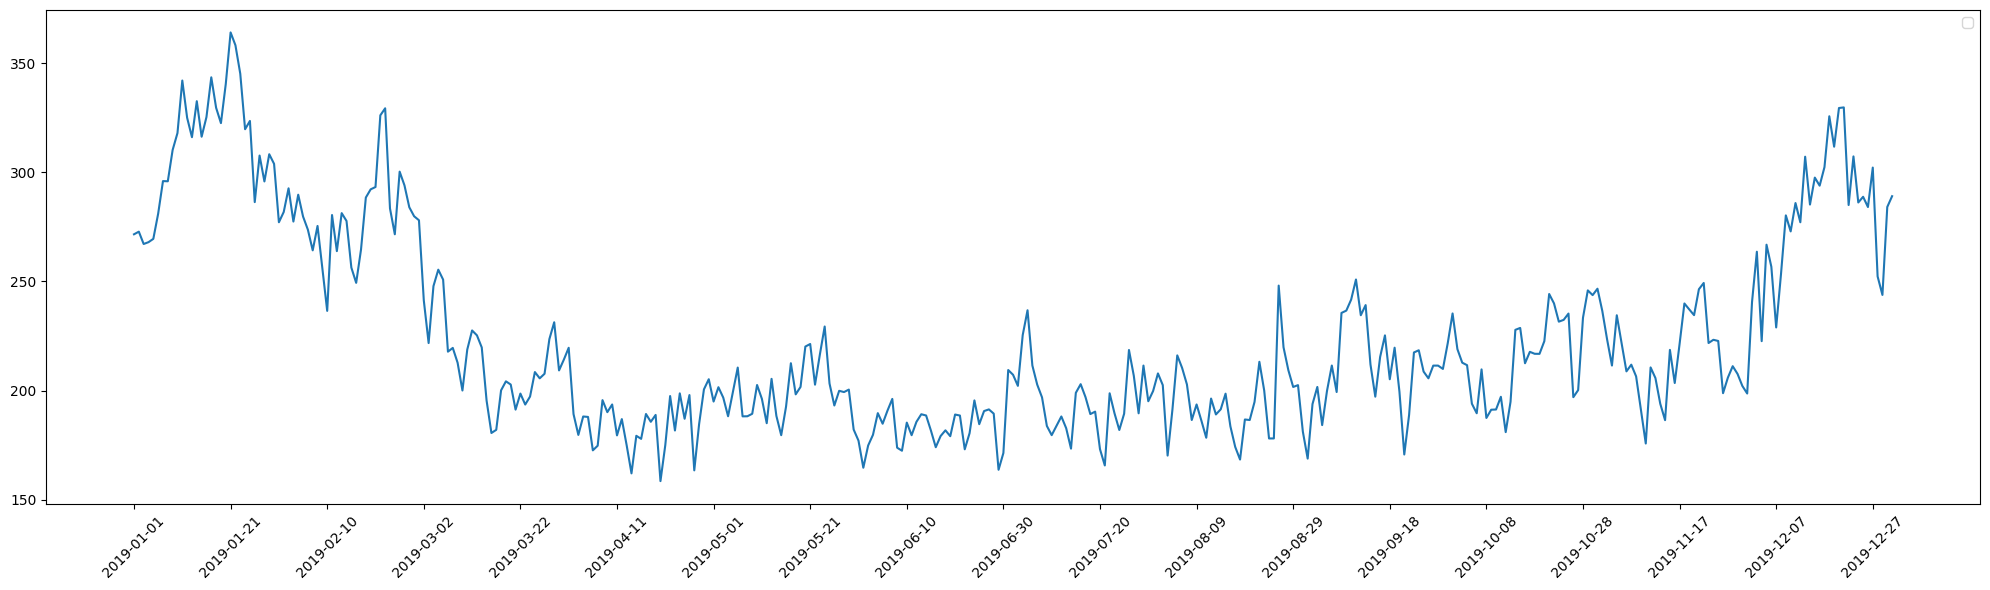

In [84]:
plt.figure(figsize=(20, 6))
plt.plot(X_test['date'], y_test_pred)
# plt.xticks(rotation=45)
plt.xticks(X_test['date'][::20], rotation=45)
# plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()